<a href="https://colab.research.google.com/github/KokBob/GDA/blob/master/GFloadBeam_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uvod a prehled

update : 25 duben 2022 \\

je potreba projet znovu beam a chystat se na zuniversalneni kodu
priprava load casu 

In [ ]:
#Easiest way to upload large datasets to Google Colab!

# Knihovny nacteni, mounting, etc .

In [ ]:
# pyg tady bude , trva moc dlouho pro beh , takze v tomhle nb bude dgl ale jen pro networkx ...
# natahnuti techto knihoven momentalne nepotrebuju hned na zacatku
# knihovny budu volat jakmile to bude aktualni
Pytorch geometric
#!pip3 install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html 
#!pip3 install torch-geometric
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-+.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=282116 sha256=cce7cfd638d5780d767dfd3c3a94c73671d8e3553ddf3d6548c93ad267d7cddc
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter
     |████████████████████████████████| 407 kB 7.8 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=c9edfdbfb8350802244022256c2a35aabaa274a719a86d10e6e2527202d9ed1f
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric
Looking in links: https://data.pyg.org/whl/torch-+.html
     |████████████████████████████████| 48 kB 3.4 MB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp37-cp37m-linux_x86_64.whl size=510031 sha256=893c47a4cb3a76fa80f883c963c0620c64c5eb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
!unzip /content/drive/MyDrive/Disertace/beam2D_torch.zip

Archive:  /content/drive/MyDrive/Disertace/beam2D_torch.zip
  inflating: beam2D_torch.bin        


In [ ]:
!unzip /content/drive/MyDrive/Disertace/beam_pickled_data

Archive:  /content/drive/MyDrive/Disertace/beam_pickled_data.zip
  inflating: beam_pickled_data.pkl   


In [ ]:
import pickle 
import torch as th
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx

In [ ]:
# puvodne je bin sejvnutej pres dgl , tu momentalne pouzivat nebudu
# G_torch = th.load(r'/content/beam2D_torch.bin',pickle_module=pickle) # 
# G = pickle.load(r'/content/beam2D_torch.bin')
#print(G_torch.ndata)

[pyg tonwtworkx](https://stackoverflow.com/questions/70452465/how-to-load-in-graph-from-networkx-into-pytorch-geometric-and-set-node-features)

In [ ]:
# G_nx = dgl.to_networkx(G_torch)
# G_nx = 

In [ ]:
#nx.draw(G_nx)

rozdeleni na X a y ..
X ... nody pro mereni , napriklad primo pod silou a v blizkem okoli
y ... ostatni nody 
... co s vetknutymi nody, tam prece napeti bude, takze je nemuzu mit jako vstupni 

---


k tomu je potreba co, inp file pro beam ... 

In [ ]:
Url_inp =r'https://raw.githubusercontent.com/KokBob/GFdataset/main/beam2D.inp'

In [ ]:
#file1 = open(Url_inp, 'r')
#Lines = file1.readlines()

In [ ]:
import base64
import requests

master = Url_inp 
req = requests.get(master)
req = req.text
#print(req)

In [ ]:
# Download Example file

!wget https://raw.githubusercontent.com/KokBob/GFdataset/main/beam2D.inp

--2022-04-25 05:20:34--  https://raw.githubusercontent.com/KokBob/GFdataset/main/beam2D.inp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3039 (3.0K) [text/plain]
Saving to: ‘beam2D.inp’

beam2D.inp          100%[===================>]   2.97K  --.-KB/s    in 0s      

2022-04-25 05:20:35 (30.2 MB/s) - ‘beam2D.inp’ saved [3039/3039]



In [ ]:
example1 = "/content/beam2D.inp"
file1 = open(example1, "r")
Lines = file1.readlines()

In [ ]:
for _ in Lines[80:89]:
  print(_)

*Nset, nset=Set-2, instance=Part-1-1

 33,

*Nset, nset=Set-BC, instance=Part-1-1, generate

  1,  23,  11

*Elset, elset=Set-BC, instance=Part-1-1

  1, 11

*End Assembly

** 

** MATERIALS



In [ ]:
print(Lines[30])

     22,          55.,           5.



ted je potreba vedet co je vevnitr

libraries to use 

In [ ]:
import re
import pandas as pd

tohle tady nepotrebuju, uz je to nahore

In [ ]:
#file1 = open(example1, "r")
#Lines = file1.readlines()
rx_dict = { 'Stared': re.compile(r'\*$'),
            '1Star': re.compile(r'\*\b'),
            '2Star': re.compile(r'\*\* \b'), }

inicializace prommennych

In [ ]:
rd = {}
i= 0
a, b = 0, 0
seq = []

loop ktery hleda vse z rx dict

## regex 

branky 
1. catch2DataFrame / nebo jinak 
2. drop unneeded 

literatura \

[1] [text odkazu](https://stackoverflow.com/questions/34002203/pull-information-from-abaqus-input-file


\ https://www.vipinajayakumar.com/parsing-text-with-python/

\ https://www.tutorialspoint.com/python/python_reg_expressions.htm

\ https://scresat.github.io/navigation/Python/11.+Regex+Dot+Star+and+the+Caret-Dollar+Characters.html)

\ https://stackoverflow.com/questions/34002203/pull-information-from-abaqus-input-file

\https://www.vipinajayakumar.com/parsing-text-with-python/

\https://www.tutorialspoint.com/python/python_reg_expressions.htm

\https://scresat.github.io/navigation/Python/11.+Regex+Dot+Star+and+the+Caret-Dollar+Characters.html
```
# Toto je naformátováno jako kód
```



In [ ]:
for line in Lines:
    try:    rd[matchingLine] = [i, b]
    except: pass
    for key, rx in rx_dict.items():
        match = rx.search(line)
        if match:   
            matchingLine = line.split('\*')[0]
            rd[matchingLine] = [i, b]
            b = i 
    i += 1

In [ ]:
# print(rd) # jen pro kontrolu 

# Prehled co je v INP

In [ ]:
for _ in rd:  
  #print( _ )
  #print( rd[_] )
  print( _ + ' : '+ str(rd[_]))

*Heading
 : [1, 0]
** Job name: Job-2 Model name: Model-1
 : [2, 1]
** Generated by: Abaqus/CAE 6.14-1
 : [3, 2]
*Preprint, echo=NO, model=NO, history=NO, contact=NO
 : [4, 3]
**
 : [75, 74]
** PARTS
 : [6, 5]
*Part, name=Part-1
 : [8, 7]
*Node
 : [42, 8]
*Element, type=CPS4R
 : [63, 42]
*Nset, nset=Set-Part, generate
 : [65, 63]
*Elset, elset=Set-Part, generate
 : [67, 65]
** Section: Section-2
 : [68, 67]
*Solid Section, elset=Set-Part, material=STEEL
 : [70, 68]
*End Part
 : [72, 70]
** ASSEMBLY
 : [74, 73]
*Assembly, name=Assembly
 : [77, 75]
*Instance, name=Part-1-1, part=Part-1
 : [78, 77]
*End Instance
 : [80, 78]
*Nset, nset=Set-2, instance=Part-1-1
 : [82, 80]
*Nset, nset=Set-BC, instance=Part-1-1, generate
 : [84, 82]
*Elset, elset=Set-BC, instance=Part-1-1
 : [86, 84]
*End Assembly
 : [88, 86]
** MATERIALS
 : [90, 88]
*Material, name=STEEL
 : [91, 90]
*Density
 : [93, 91]
*Elastic
 : [96, 93]
** BOUNDARY CONDITIONS
 : [98, 96]
** Name: BC-1 Type: Symmetry/Antisymmetry/Encast

dalsi dobry pristup

In [ ]:
inputfile = example1
with open(inputfile, 'r') as inpDeck: lines = inpDeck.read()
lines2=re.findall(r"^\*Element", lines, flags=re.IGNORECASE|re.MULTILINE)

# Cteni mezi radky
tady chci dostat jen radky definovany int1, int2 

## Nody

In [ ]:
nodes_lines = Lines[8:42] #jednoduse ... ale jak je pak narvu do dataframu ?

### string lines to dataframe python

In [ ]:
# string lines to dataframe python
#Use pandas. read_csv() to create a DataFrame from a string
#data_string = """Letters, Numbers.
#a, 1.
#b, 2.
#c, 3"""
import io
data_string = nodes_lines[1:] # keyword musim odsud dostat

In [ ]:
# for ds_ in data_string: print(ds_)

In [ ]:
Lines[8:42]

['*Node\n',
 '      1,           0.,           0.\n',
 '      2,          5.5,           0.\n',
 '      3,          11.,           0.\n',
 '      4,         16.5,           0.\n',
 '      5,          22.,           0.\n',
 '      6,         27.5,           0.\n',
 '      7,          33.,           0.\n',
 '      8,         38.5,           0.\n',
 '      9,          44.,           0.\n',
 '     10,         49.5,           0.\n',
 '     11,          55.,           0.\n',
 '     12,           0.,           5.\n',
 '     13,          5.5,           5.\n',
 '     14,          11.,           5.\n',
 '     15,         16.5,           5.\n',
 '     16,          22.,           5.\n',
 '     17,         27.5,           5.\n',
 '     18,          33.,           5.\n',
 '     19,         38.5,           5.\n',
 '     20,          44.,           5.\n',
 '     21,         49.5,           5.\n',
 '     22,          55.,           5.\n',
 '     23,           0.,          10.\n',
 '     24,          5.

In [ ]:
# https://stackoverflow.com/questions/42171709/creating-pandas-dataframe-from-a-list-of-strings
list_vals = data_string
df_nodes = pd.read_csv(io.StringIO('\n'.join(list_vals)),
 delim_whitespace=True,
 names = ['nol','x','y'])

In [ ]:
print(df_nodes)

    nol      x     y
0    1,    0.,   0.0
1    2,   5.5,   0.0
2    3,   11.,   0.0
3    4,  16.5,   0.0
4    5,   22.,   0.0
5    6,  27.5,   0.0
6    7,   33.,   0.0
7    8,  38.5,   0.0
8    9,   44.,   0.0
9   10,  49.5,   0.0
10  11,   55.,   0.0
11  12,    0.,   5.0
12  13,   5.5,   5.0
13  14,   11.,   5.0
14  15,  16.5,   5.0
15  16,   22.,   5.0
16  17,  27.5,   5.0
17  18,   33.,   5.0
18  19,  38.5,   5.0
19  20,   44.,   5.0
20  21,  49.5,   5.0
21  22,   55.,   5.0
22  23,    0.,  10.0
23  24,   5.5,  10.0
24  25,   11.,  10.0
25  26,  16.5,  10.0
26  27,   22.,  10.0
27  28,  27.5,  10.0
28  29,   33.,  10.0
29  30,  38.5,  10.0
30  31,   44.,  10.0
31  32,  49.5,  10.0
32  33,   55.,  10.0


## Elementi
odsat nejak dostat jen *Element a typ elementu nekde storovat, 
pro pripad ze bude multiple elementing model 

jak to nacpat do dashplotu?

In [ ]:
Lines[42:63] #jednoduse ... ale jak je pak narvu do dataframu ?

['*Element, type=CPS4R\n',
 ' 1,  1,  2, 13, 12\n',
 ' 2,  2,  3, 14, 13\n',
 ' 3,  3,  4, 15, 14\n',
 ' 4,  4,  5, 16, 15\n',
 ' 5,  5,  6, 17, 16\n',
 ' 6,  6,  7, 18, 17\n',
 ' 7,  7,  8, 19, 18\n',
 ' 8,  8,  9, 20, 19\n',
 ' 9,  9, 10, 21, 20\n',
 '10, 10, 11, 22, 21\n',
 '11, 12, 13, 24, 23\n',
 '12, 13, 14, 25, 24\n',
 '13, 14, 15, 26, 25\n',
 '14, 15, 16, 27, 26\n',
 '15, 16, 17, 28, 27\n',
 '16, 17, 18, 29, 28\n',
 '17, 18, 19, 30, 29\n',
 '18, 19, 20, 31, 30\n',
 '19, 20, 21, 32, 31\n',
 '20, 21, 22, 33, 32\n']

In [ ]:
element_lines = Lines[42:63]

In [ ]:
# tady bude potreba nejak vytahnout typ elementu , to bude totiz vstupovat do dalsi methody / metod 
elementTypeLine = element_lines[0].split('type=')
elementType = elementTypeLine[-1]
print(elementType)

CPS4R



In [ ]:
# budu to chtit v dict nebo v listu ? jak to na zaver cistit a publikovat CaPB
#namesOfElementColumns = 
df_elements = pd.read_csv(io.StringIO('\n'.join(element_lines)),
                        delim_whitespace=True, 
                        skiprows=1
                       )
print(df_elements)

     1, 1,.1   2,  13,  12
0    2,   2,   3,  14,  13
1    3,   3,   4,  15,  14
2    4,   4,   5,  16,  15
3    5,   5,   6,  17,  16
4    6,   6,   7,  18,  17
5    7,   7,   8,  19,  18
6    8,   8,   9,  20,  19
7    9,   9,  10,  21,  20
8   10,  10,  11,  22,  21
9   11,  12,  13,  24,  23
10  12,  13,  14,  25,  24
11  13,  14,  15,  26,  25
12  14,  15,  16,  27,  26
13  15,  16,  17,  28,  27
14  16,  17,  18,  29,  28
15  17,  18,  19,  30,  29
16  18,  19,  20,  31,  30
17  19,  20,  21,  32,  31
18  20,  21,  22,  33,  32


In [ ]:
#for key_ in rd.keys(): print(key_)
# rd['*Element, type=CPS4R ']


In [ ]:
# dir(lines2) hledam cisla radku pro matchingove 

## X Elementi indentifikace


*Nset, nset=Set-BC, instance=Part-1-1, generate
 : [84, 82]

 tady bude dulezite predpokladat ze je hodne set BC
 hlavne potrebuju dostat mereci body pro vstup ... tam kde budou sensori... jak 



In [ ]:
#lementi_BC = Lines[84, 82] # tady se musi prohodit cisla ... nejak to zautomatizovat... ! elegantne

In [ ]:
#lementi_BC = Lines[82::84] # tenhle pristup nebere posledni  
lementi_BC = Lines[82:84] # tady je to spravne
for _ in lementi_BC:
  print(_)

*Nset, nset=Set-BC, instance=Part-1-1, generate

  1,  23,  11



to namirit na augmente reality ? nedela to treba uz ansys 
 ... new century designer handbook ...
 nerikam , ze to co se dela ted je spatne, jen to ze uz prisel cas na novy level. Grafove to uz tak proste je.
 Sestavy jsou grafove, nikdy nebudou hezky maticove pro nejake fajn analyzy jako je obraz etc. 

In [ ]:
df_BC = pd.read_csv(io.StringIO('\n'.join(lementi_BC)),
                        delim_whitespace=True, 
                        skiprows=1
                       )
print(df_BC)

Empty DataFrame
Columns: [1,, 23,, 11]
Index: []


tohle je asi silovy lement pro mereni, mel bych kouknout na aktualni beam \\
*Nset, nset=Set-2, instance=Part-1-1
 : [82, 80]

In [ ]:
lementi_SET2 = Lines[80:82] # tady je to spravne
df_SET2 = pd.read_csv(io.StringIO('\n'.join(lementi_SET2)),
                        delim_whitespace=True, 
                        skiprows=1
                       )
print(df_SET2)

Empty DataFrame
Columns: [33,]
Index: []


Jak to vsechno visualizovat ???

# Pikling load vysledku 

In [ ]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 7.3 MB/s 


Naloudovani framu z vysledku
* pro kazdy nod
* U.mag, U.U1, U.U2, s.MISES, S.MAXP

In [ ]:
D_path = "/content/beam_pickled_data.pkl"
with open(D_path, "rb") as input_file:
       fms = pickle.load(input_file) #

### data see from R ... RPTs 

In [ ]:
# co je celkove v datasetu
# print(fms)

# priprava datasetu
predpoklad ze setBC uchovava X a vse ostatni je Y


[ltx bb](https://tex.stackexchange.com/questions/505648/how-to-write-this-symbol-vee-with-double-line-left)
\
[ltx bb2](https://tex.stackexchange.com/questions/439222/how-to-make-double-struck-capital-letters-italic-e-g-u1d53c)

In [ ]:
# framy z datasetu 
# for _ in fms.keys(): print(_)

## X prep
Co je vstupem ... data ze senzoru
sensorem muze by strain gauge, tj merit pretvoreni nebo zrychleni, ci dokonce kombinace. to se pak samozrejme musi skalovat nejakou metodou . 
Set v inp se nejak jmenuje

*Nset, nset=Set-2, instance=Part-1-1
 : [82, 80]

 staci tak malo vstupu ? \\
 kolik je akorat ? \\
 toto je dobra otazka na clanek ...\\
 neighbourhooding \\
 co kdyz bude fakt potreba hodne senzoru, ale ne vsude bude mozne je implemnetovat?

In [ ]:
# print(G)

## y prep 
Woo ostatni nody mimo X
$y$

In [ ]:
jelikoz zrejme ze zacatku mirim na node classification 
a pak az na link prediction smis vahy pro algoritmus ... 


# Nová sekce

# vizualizace pres vtk 

pouze test jak instalovat vtk v colabu.
Funguje spravne, priklad neni vytvoreny

In [ ]:
#!pip3 install vtk

# test pymapdl

In [ ]:
#!pip3 install pymapdl

# Load Graph pres torch
z githubu 
torch format
https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7


In [ ]:
!wget https://github.com/KokBob/GFdataset/upload/main/beam2D.bin
!wget https://github.com/KokBob/GFdataset/upload/main/beam2D.g

--2022-04-25 05:20:43--  https://github.com/KokBob/GFdataset/upload/main/beam2D.bin
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘beam2D.bin’

beam2D.bin              [ <=>                ]  85.29K  --.-KB/s    in 0.02s   

2022-04-25 05:20:43 (5.36 MB/s) - ‘beam2D.bin’ saved [87335]

--2022-04-25 05:20:43--  https://github.com/KokBob/GFdataset/upload/main/beam2D.g
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘beam2D.g’

beam2D.g                [ <=>                ]  85.22K  --.-KB/s    in 0.01s   

2022-04-25 05:20:43 (5.56 MB/s) - ‘beam2D.g’ saved [87261]



In [ ]:
!pip3 install dgl

     |████████████████████████████████| 4.4 MB 7.0 MB/s 


In [ ]:
import torch as th
G_torch = th.load("./beam2D_torch.bin")

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# Cteni grafu pres DGL

In [ ]:
from dgl.data.utils import save_graphs
import torch as th
from dgl.data.utils import load_graphs
import dgl

In [ ]:
#G = dgl.load_graphs("./beam2D.bin", ) # tohle tady nefunguje

In [ ]:
G_torch = th.load("./beam2D_torch.bin")
# GL = dgl.load_graphs("./beam2D.g")
# G_DGL = dgl.load_graphs("./beam2D.bin")

In [ ]:
for _ in dir(G_torch):print(_)


__class__
__contains__
__copy__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__str__
__subclasshook__
__weakref__
_batch_num_edges
_batch_num_nodes
_canonical_etypes
_dsttypes_invmap
_edge_frames
_etype2canonical
_etypes
_etypes_invmap
_find_etypes
_get_e_repr
_get_n_repr
_graph
_idtype_str
_init
_is_unibipartite
_node_frames
_ntypes
_pop_e_repr
_pop_n_repr
_reset_cached_info
_set_e_repr
_set_n_repr
_srctypes_invmap
add_edge
add_edges
add_nodes
add_self_loop
adj
adjacency_matrix
adjacency_matrix_scipy
all_edges
apply_edges
apply_nodes
astype
batch_num_edges
batch_num_nodes
batch_size
canonical_etypes
clone
cpu
create_formats_
device
dstdata
dstnodes
dsttypes
edata
edge_attr_schemes
edge_id
edge_ids
edge_subgraph
edge_type_subgraph
edges
etypes
filter_edges
filter_nodes
find_edges
fo

In [ ]:
G = G_torch 
G_nds = G.nodes


In [ ]:
#print(G.ndata) # ok

In [ ]:
print(G._graph) # ok

In [ ]:
Gnx = G.to_networkx()

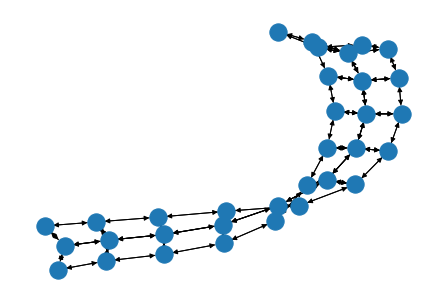

In [ ]:
nx.draw(Gnx)

# Dalsi myslenky
zacit implementovat a porovnavat ... [Good-bye Pandas! Meet Terality — Its Evil Twin With Identical Syntax](https://medium.com/towards-data-science/good-bye-pandas-meet-terality-its-evil-twin-with-identical-syntax-455b42f33a6d)

**tensoboard a pytorch ** 
jako zajimavy pristup
\
https://medium.com/looka-engineering/how-to-use-tensorboard-with-pytorch-in-google-colab-1f76a938bc34
\
https://neptune.ai/blog/tensorboard-tutorial

\
spliting pres knihovnu ogb
https://ogb.stanford.edu/docs/nodeprop/?msclkid=49a64c11ba2011ec84a4b7ec87cac64d#ogbn-arxiv
\\

https://docs.dgl.ai/tutorials/multi/2_node_classification.html?msclkid=e8736f10ba1e11ec8d8cfc33b4e31bc1

 \\

 https://towardsdatascience.com/karate-club-a-python-library-for-graph-representation-learning-e70857112476

 \\
 https://distill.pub/2021/gnn-intro/?msclkid=04f4ff18ba5d11ecaf9508daec32994d
 \\